<a href="https://colab.research.google.com/github/Yislein/Distribuidos/blob/main/Push_%26_Pull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-a9b320c5fdb4>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodos_infectados_inicialmente = random.sample(G.nodes(), num_infectados_inicial)


Simulación inicial:
Nodos infectados: 20

Simulación después de la infección:
Nodos infectados: 100


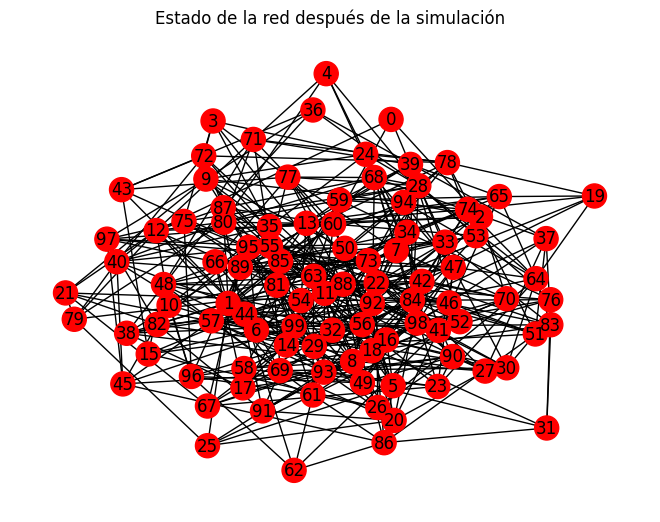

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def inicializar_red(num_nodos, tasa_inicial_infeccion):

    G = nx.erdos_renyi_graph(num_nodos, 0.1)

    # Inicializa todos los nodos como no infectados
    nx.set_node_attributes(G, {nodo: False for nodo in G.nodes()}, 'infectado')

    # Infecta aleatoriamente un porcentaje de nodos al inicio
    num_infectados_inicial = int(num_nodos * tasa_inicial_infeccion)
    nodos_infectados_inicialmente = random.sample(G.nodes(), num_infectados_inicial)
    for nodo in nodos_infectados_inicialmente:
        G.nodes[nodo]['infectado'] = True

    return G

def propagar_infeccion(G):
    while True:
        actualizado = False

        # Itera sobre cada nodo en la red
        for nodo in G.nodes():
            # Si el nodo está infectado, intenta infectar a sus vecinos
            if G.nodes[nodo]['infectado']:
                vecinos = list(G.neighbors(nodo))
                for vecino in vecinos:
                    if not G.nodes[vecino]['infectado']:
                        G.nodes[vecino]['infectado'] = True
                        actualizado = True
            # Si el nodo no está infectado, se infecta si tiene al menos un vecino infectado
            else:
                vecinos = list(G.neighbors(nodo))
                for vecino in vecinos:
                    if G.nodes[vecino]['infectado']:
                        G.nodes[nodo]['infectado'] = True
                        actualizado = True
                        break
        # Si no hay cambios en la infección, termina el bucle
        if not actualizado:
            break

def contar_nodos_infectados(G):
    # Cuenta y devuelve el número de nodos infectados en la red
    nodos_infectados = [nodo for nodo in G.nodes() if G.nodes[nodo]['infectado']]
    return len(nodos_infectados)

def graficar_red(G):
    # Genera la disposición de los nodos y dibuja la red
    disposicion_nodos = nx.spring_layout(G)
    nodos_infectados = [nodo for nodo in G.nodes() if G.nodes[nodo]['infectado']]
    colores_nodos = ['red' if nodo in nodos_infectados else 'blue' for nodo in G.nodes()]
    nx.draw(G, disposicion_nodos, with_labels=True, node_color=colores_nodos)
    plt.title('Estado de la red después de la simulación')
    plt.show()

if __name__ == "__main__":
    num_nodos = 100
    tasa_inicial_infeccion = 0.2

    # Inicializa la red
    red = inicializar_red(num_nodos, tasa_inicial_infeccion)

    print("Simulación inicial:")
    print("Nodos infectados:", contar_nodos_infectados(red))

    # Propaga la infección en la red
    propagar_infeccion(red)

    print("\nSimulación después de la infección:")
    print("Nodos infectados:", contar_nodos_infectados(red))

    # Grafica el estado de la red después de la simulación
    graficar_red(red)

